# Data Science Project: Credit Scoring
###http://www.kaggle.com/c/GiveMeSomeCredit

###김병건
###윤희경
###조유현

In [2]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import data
data = pd.DataFrame.from_csv('cs-training.csv', encoding = 'utf-8')
print
print 'columns are', data.columns
print 
print 'data shape is', data.shape
print
data.head(30)


columns are Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age', u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome', u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate', u'NumberRealEstateLoansOrLines', u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'], dtype='object')

data shape is (150000, 11)



,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


#1. SeriousDlqin2yrs 
###Person experienced 90 days past due delinquency or worse 

In [4]:
SeriousDlqin2yrs = data['SeriousDlqin2yrs']
print SeriousDlqin2yrs.head(10)

1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: SeriousDlqin2yrs, dtype: int64


In [5]:
xData = np.sort(SeriousDlqin2yrs.unique())
print 'unique values are', xData
yData = np.bincount(SeriousDlqin2yrs)
print 'count are [0 1] = ', yData

unique values are [0 1]
count are [0 1] =  [139974  10026]


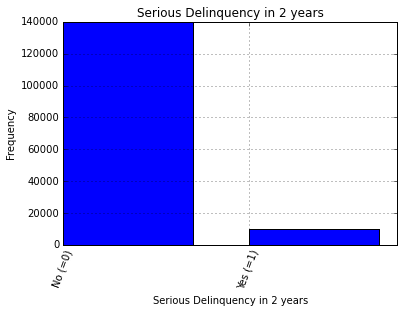

In [6]:
plt.bar(xData, yData, 0.70)
plt.xticks(xData, ('No (=0)', 'Yes (=1)'))
plt.xticks(rotation=70)
plt.xlabel("Serious Delinquency in 2 years")
plt.ylabel("Frequency")
plt.title("Serious Delinquency in 2 years")
plt.grid()

#2. RevolvingUtilizationOfUnsecuredLines
###Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

In [7]:
# examine column by column
# 2. RevolvingUtilizationOfUnsecuredLines
RevolvingUtilizationOfUnsecuredLines = data['RevolvingUtilizationOfUnsecuredLines']
print RevolvingUtilizationOfUnsecuredLines.head(10)
print type(RevolvingUtilizationOfUnsecuredLines)

1     0.766127
2     0.957151
3     0.658180
4     0.233810
5     0.907239
6     0.213179
7     0.305682
8     0.754464
9     0.116951
10    0.189169
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
<class 'pandas.core.series.Series'>


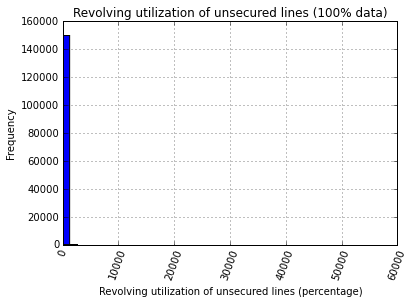

In [8]:
plt.hist(np.array(RevolvingUtilizationOfUnsecuredLines),40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Revolving utilization of unsecured lines (percentage)")
plt.ylabel("Frequency")
plt.title("Revolving utilization of unsecured lines (100% data)")
plt.grid()


Since outliers make it difficult to interpret the graph, we need to get rid of the outliers.


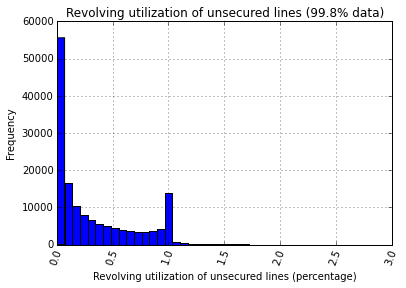

In [9]:
## Remove outliers
# sort the data
Revolving_sorted = np.sort(np.array(RevolvingUtilizationOfUnsecuredLines))

# 0.2 percent of the data are ignored -> only 99.8 percent data will be plotted
percentile_99_8 = Revolving_sorted.size * 0.002
plt.hist(Revolving_sorted[:-percentile_99_8], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Revolving utilization of unsecured lines (percentage)")
plt.ylabel("Frequency")
plt.title("Revolving utilization of unsecured lines (99.8% data)")
plt.grid()

#3. Age
###Age of borrower in years

In [10]:
age = data['age']
print age.head(10)

1     45
2     40
3     38
4     30
5     49
6     74
7     57
8     39
9     27
10    57
Name: age, dtype: int64


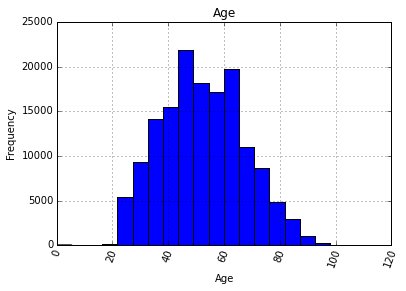

In [11]:
plt.hist(np.array(age),20)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age")
plt.grid()

#4. NumberOfTime30-59DaysPastDueNotWorse
###Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

In [12]:
NumberOfTime30_59DaysPastDueNotWorse = data['NumberOfTime30-59DaysPastDueNotWorse']
print NumberOfTime30_59DaysPastDueNotWorse.head(10)

1     2
2     0
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    0
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


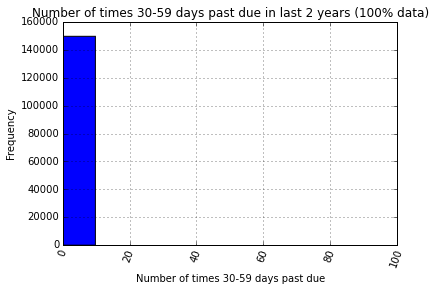

In [13]:
plt.hist(np.array(NumberOfTime30_59DaysPastDueNotWorse))
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Number of times 30-59 days past due")
plt.ylabel("Frequency")
plt.title("Number of times 30-59 days past due in last 2 years (100% data)")
plt.grid()

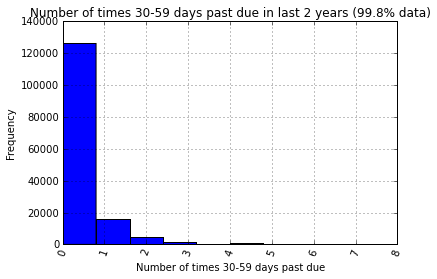

In [14]:
## Remove outliers
# sort the data
NumberOfTime30_59DaysPastDue_sorted = np.sort(np.array(NumberOfTime30_59DaysPastDueNotWorse))

# 0.2 percent of the data are ignored -> only 99.8 percent data will be plotted
percentile_99_8 = NumberOfTime30_59DaysPastDue_sorted.size * 0.002
plt.hist(NumberOfTime30_59DaysPastDue_sorted[:-percentile_99_8])
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Number of times 30-59 days past due")
plt.ylabel("Frequency")
plt.title("Number of times 30-59 days past due in last 2 years (99.8% data)")
plt.grid()

#5. DebtRatio

In [15]:
DebtRatio = data['DebtRatio']
print DebtRatio.head(10)

1        0.802982
2        0.121876
3        0.085113
4        0.036050
5        0.024926
6        0.375607
7     5710.000000
8        0.209940
9       46.000000
10       0.606291
Name: DebtRatio, dtype: float64


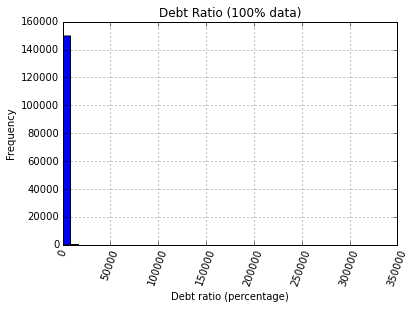

In [16]:
plt.hist(np.array(DebtRatio),40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Debt ratio (percentage)")
plt.ylabel("Frequency")
plt.title("Debt Ratio (100% data)")
plt.grid()

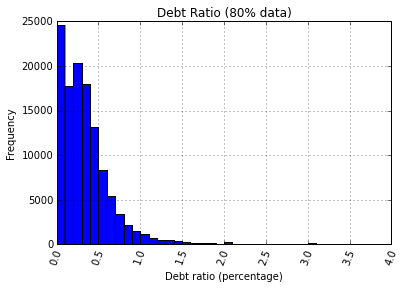

In [17]:
## Remove outliers
# sort the data
DebtRatio_sorted = np.sort(np.array(DebtRatio))

# 20 percent of the data are ignored -> only 80 percent data will be plotted
percentile_80 = DebtRatio_sorted.size * 0.2
plt.hist(DebtRatio_sorted[:-percentile_80], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Debt ratio (percentage)")
plt.ylabel("Frequency")
plt.title("Debt Ratio (80% data)")
plt.grid()

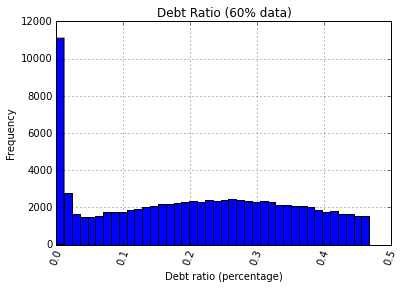

In [18]:
# 40 percent of the data are ignored -> only 60 percent data will be plotted
percentile_60 = DebtRatio_sorted.size * 0.4
plt.hist(DebtRatio_sorted[:-percentile_60], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Debt ratio (percentage)")
plt.ylabel("Frequency")
plt.title("Debt Ratio (60% data)")
plt.grid()

In [19]:
# two features relationship
# 1. remove outlier
# 2. implement code to find out 11 * 10 relationships

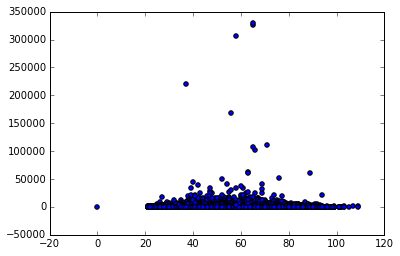

In [20]:
plt.scatter(age, DebtRatio)

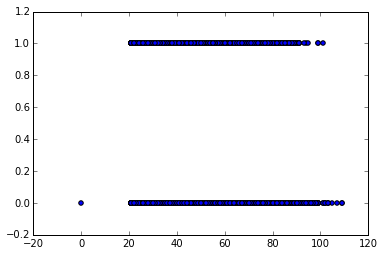

In [21]:
plt.scatter(age, SeriousDlqin2yrs)

In [22]:
plt.scatter(age, MonthlyIncome)

NameError: name 'MonthlyIncome' is not defined

In [ ]:
plt.scatter(age, NumberOfTime30_59DaysPastDueNotWorse)

In [ ]:
plt.scatter(age, RevolvingUtilizationOfUnsecuredLines)

In [ ]:
plt.scatter(DebtRatio, SeriousDlqin2yrs)

In [ ]:
plt.scatter(DebtRatio, NumberOfTime30_59DaysPastDueNotWorse)

In [ ]:
data_sorted_Number3059 = data.sort(columns = 'NumberOfTime30-59DaysPastDueNotWorse')
data_sorted_Number3059_99percent = data_sorted_Number3059.iloc[0:150000*0.99, :]
data_sorted_Number3059_99percent.shape


In [ ]:
plt.scatter(data_sorted_Number3059_99percent['DebtRatio'], data_sorted_Number3059_99percent['NumberOfTime30-59DaysPastDueNotWorse'])

In [ ]:
data_sorted_Number3059_99percent_DebtRatio = \
data_sorted_Number3059_99percent.sort(columns = 'DebtRatio').iloc[0:149700*0.78, :]

In [ ]:
plt.scatter(data_sorted_Number3059_99percent_DebtRatio['DebtRatio'], \
            data_sorted_Number3059_99percent_DebtRatio['NumberOfTime30-59DaysPastDueNotWorse'])

In [ ]:
bincounted = np.bincount(data_sorted_Number3059_99percent_DebtRatio['NumberOfTime30-59DaysPastDueNotWorse'])
print bincounted

In [ ]:
type(data.sort(columns = 'age')['DebtRatio'])